In [1]:
#!/usr/bin/env python
from __future__ import absolute_import, unicode_literals, print_function
import numpy as np
from numpy import pi, cos
from pymultinest.solve import solve, run
import os
import matplotlib.pyplot as plt
try: os.mkdir('chains')
except OSError: pass

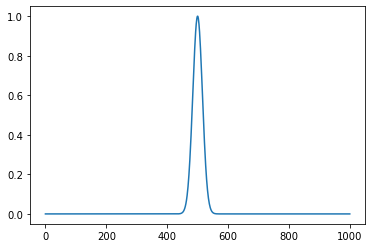

In [2]:
x = np.linspace(-5, 5, 1000) 
y = np.linspace(-5, 5, 1000) 

plt.plot(np.exp(-((x ** 2)/0.1 + (y ** 2)/0.1)))

In [3]:
# (-2, 2), (-2, 2)

def myprior(cube):
    cube[0] = (cube[0] - 0.5) * 10
    cube[1] = (cube[1] - 0.5) * 10 # transforms from (0, 1), (0, 1) to (-5, 5), (-5, 5)
    return cube  

def myloglike(cube):
    # print(f'CUBE:{cube}')
    return np.exp(-(cube[0] ** 2 + cube[1] ** 2)/1.)
    
#     x = np.exp(-cube[0] ** 2)
#     y = np.exp(-cube[1] ** 2) # gaussian
#     # print(gaussian)
#     return x*y  # centered on 0

In [ ]:
# number of dimensions our problem has
parameters = ["x", "y"]
n_params = len(parameters)
# name of the output files
prefix = "chains/3-"

# run MultiNest
result = solve(LogLikelihood=myloglike, Prior=myprior, 
               n_dims=n_params, n_live_points=int(1e5), evidence_tolerance=0.1, outputfiles_basename=prefix, verbose=True)
# run()
# print()
# print('evidence: %(logZ).1f +- %(logZerr).1f' % result)
# print()
# print('parameter values:')
# for name, col in zip(parameters, result['samples'].transpose()):
# 	print('%15s : %.3f +- %.3f' % (name, col.mean(), col.std()))

# make marginal plots by running:
# $ python multinest_marginals.py chains/3-
# For that, we need to store the parameter names:
# import json
# with open('%sparams.json' % prefix, 'w') as f:
# 	json.dump(parameters, f, indent=2)

In [ ]:
result['samples'].shape

In [ ]:
import corner
from matplotlib.colors import LogNorm
x_samples = result['samples'][:,0]
y_samples = result['samples'][:,1]
plt.hist2d(x_samples.reshape(-1), y_samples.reshape(-1), norm = LogNorm(), bins=1000)
#corner.hist2d(x_samples, y_samples, s=0.1, bins=200, plot_datapoints=False, plot_density=False, levels=[0.68, 0.95, 0.99], color='r')
plt.savefig('2dgaussian.png', fmt='png')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].hist(x_samples)
ax[0].set_xlabel('x')
ax[1].hist(y_samples)
ax[1].set_xlabel('y')
plt.savefig('1d_histograms.png', fmt='png')

In [ ]:
# plt.hist(result['samples'])
# plt.savefig('gaussian.png', fmt='png')